In [8]:
print ("Manuel Daza - 202016908_59")

Manuel Daza - 202016908_59


In [1]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

#Librerias para modelos K-means
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

#Librerias para evaluar el modelo
from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

#]Libreria para evitar advertencia por falta de memoria
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Leemos los datos para cargarlos en la variable

data = pd.read_csv('./mall_customers.csv')

In [3]:
#1. Analisis Exploratorio de los Datos:

data.head(50)

,ClienteID,Genero,Edad,Anual Salario(k$),Puntaje Compras (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
#Descripcion de los datos

data.describe()

,ClienteID,Edad,Anual Salario(k$),Puntaje Compras (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
#2. Preprocesar los datos limpiándolos:

data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,ClienteID,Edad,Anual Salario(k$),Puntaje Compras (1-100)
count,200,200,200,200
mean,100.5,38.85,60.56,50.2
std,57.8792,13.969,26.2647,25.8235
min,1,18,15,1
25%,50.75,28.75,41.5,34.75
50%,100.5,36,61.5,50
75%,150.25,49,78,73
max,200,70,137,99


Text(0.5, 1.0, 'Identificación Datos Faltantes')

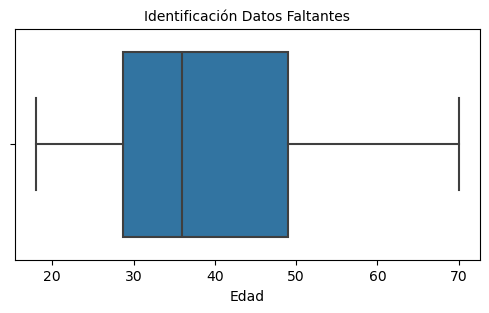

In [10]:
# Grafico para identificar valores faltantes

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Edad'])
plt.title('Identificación Datos Faltantes', fontsize=10)

In [12]:
#Revisamos Datos Faltantes

print ("Edad: ",data['Edad'].isin([0]).sum())
print ("Salario Anual: ",data['Anual Salario(k$)'].isin([0]).sum())
print ("Puntaje de Credito: ",data['Puntaje Compras (1-100)'].isin([0]).sum())

Edad:  0
Salario Anual:  0
Puntaje de Credito:  0


Text(0.5, 1.0, 'Identificación Datos Atípicos')

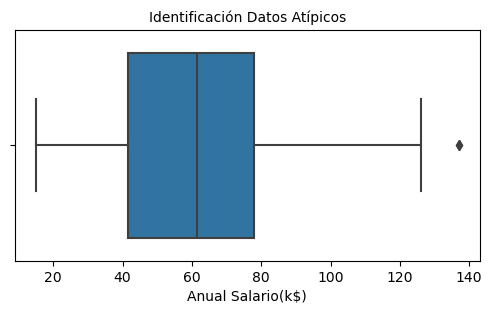

In [13]:
# Grafico para identificar valores Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Anual Salario(k$)'])
plt.title('Identificación Datos Atípicos', fontsize=10)

In [31]:
#Conteo Datos atipicos

hr_min=90
hr_max=190
total_atipicos=((data['heart_rate']<hr_min)|(data['heart_rate']>hr_max)).sum()
print("El total de datos atipicos es: {}".format(total_atipicos))

El total de datos atipicos es: 6


In [32]:
#Filtrar datos atipicos
data=data[(data['heart_rate']<hr_max)&(data['heart_rate']>hr_min)]

In [33]:
#Revisar que fueron filtrados

hr_min=90
hr_max=190
total_atipicos=((data['heart_rate']<hr_min)|(data['heart_rate']>hr_max)).sum()
print("El total de datos atipicos es: {}".format(total_atipicos))

El total de datos atipicos es: 0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 296
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                289 non-null    int64  
 1   gender             289 non-null    int64  
 2   chest_pain         289 non-null    int64  
 3   blood_pressure     289 non-null    int64  
 4   cholesterol        289 non-null    int64  
 5   blood_sugar        289 non-null    int64  
 6   electrocardiogram  289 non-null    int64  
 7   heart_rate         289 non-null    int64  
 8   exang              289 non-null    int64  
 9   oldpeak            289 non-null    float64
 10  slope              289 non-null    int64  
 11  ca                 289 non-null    int64  
 12  thal               289 non-null    int64  
 13  condition          289 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.9 KB


condition — (El Valor que nos interesa) — diagnosis of heart disease (angiographic disease status) Value 0: < 50% diameter narrowing Value 1: > 50% diameter narrowing

In [35]:
#3. Seleccionar las características más relevantes para entrenar:
#El objetivo es detectar la presencia de una enfermedad cardíaca.

data['condition'].value_counts()

condition
0    156
1    133
Name: count, dtype: int64

In [36]:
data['condition'].head(30)

0     0
1     0
2     0
3     1
4     0
5     0
6     0
7     1
8     0
9     0
10    1
11    1
12    1
13    0
14    0
16    0
17    0
18    1
19    0
20    0
21    1
22    0
23    0
24    0
25    0
26    1
27    0
28    1
29    0
30    0
Name: condition, dtype: int64

In [38]:
#4. Dividir el dataset en Train y Test para evaluar:
#Usamos 75% para entrenamiento y 25% para pruebas

X = data.drop('condition',axis=1)
Y = data['condition']

#Se usa la funcion train_test_split para separar el bloque de entrenamiento:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

In [42]:
print(X_train)

     age  gender  chest_pain  blood_pressure  cholesterol  blood_sugar  \
275   45       1           3             104          208            0   
23    74       0           1             120          269            0   
93    60       1           2             140          185            0   
292   40       1           3             152          223            0   
72    76       0           2             140          197            0   
..   ...     ...         ...             ...          ...          ...   
143   43       1           2             130          315            0   
202   60       1           3             140          293            0   
240   55       1           3             132          353            0   
181   63       0           3             108          269            0   
233   57       1           3             132          207            0   

     electrocardiogram  heart_rate  exang  oldpeak  slope  ca  thal  
275                  2         148      1

In [43]:
print(Y_train)

275    0
23     0
93     1
292    1
72     0
      ..
143    0
202    1
240    1
181    1
233    0
Name: condition, Length: 216, dtype: int64


In [44]:
#5. Entrenar el modelo configurando los diferentes hiperparámetros.

mod_regresion = LogisticRegression(solver = "liblinear")
mod_regresion.fit (X_train, Y_train)

#Modelo de Prediccion

prediccion = mod_regresion.predict(X_test)

In [45]:
print (Y_test)

244    1
33     1
248    1
167    1
272    0
      ..
128    1
140    0
111    0
221    1
107    0
Name: condition, Length: 73, dtype: int64


In [46]:
print (prediccion)

[1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1
 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1]


In [47]:
#6. Evaluar el desempeño del modelo en el conjunto de Test

print (classification_report(Y_test,prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        39
           1       0.88      0.85      0.87        34

    accuracy                           0.88        73
   macro avg       0.88      0.88      0.88        73
weighted avg       0.88      0.88      0.88        73



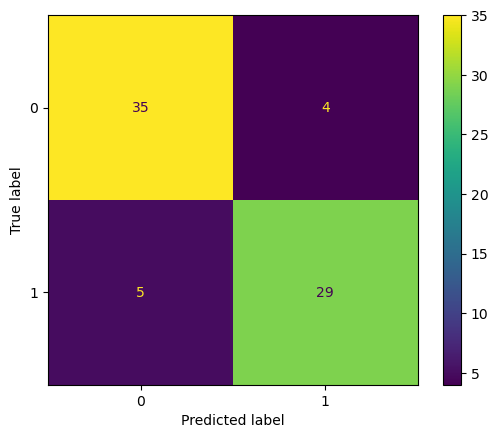

In [49]:
#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

mc=confusion_matrix(Y_test,prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=mc)
disp.plot()

<function matplotlib.pyplot.show(close=None, block=None)>

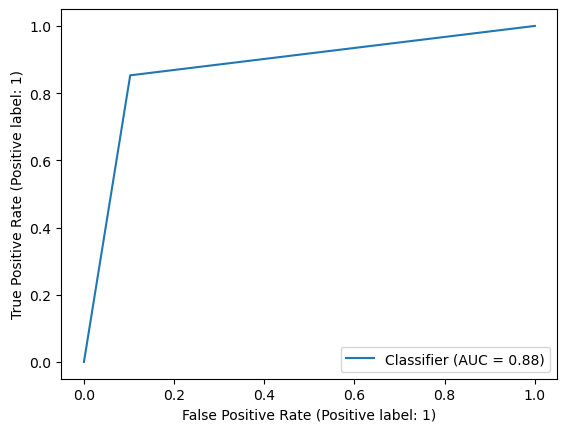

In [52]:
RocCurveDisplay.from_predictions(Y_test, prediccion)
plt.show

#8. Interpretar, analizar y documentar los resultados obtenidos.

Grafica Matriz de confusion:
35 veces el algoritmo predijo que el paciente NO tenía condiciones cardiacas de manera acertada.
29 veces el algoritmo predijo que el paciente SI tenía condiciones cardiacas de manera acertada.
5 veces el algoritmo predijo que el peciente NO tenía condiciones cardiacas, pero en realidad SI.
4 veces el algoritmo predijo que el paciente Si tenía condiciones cardiacas, pero en realidad NO.

Grafica Curva ROC
Nos muestra como resultado un AUC = 0.88, lo cual se puede interpretar como un 88% de predicciones acertadas.
